In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib notebook
import seaborn as sns
import scipy.optimize as op

# Logistic Regression Without Regularization

Using logistic regression to predict probability of admission into university given the values of each students exam scores.

In [2]:
data = np.loadtxt('ex2data1.txt', delimiter=',')

In [3]:
# The first two columns of X represent the subject's exam 1 and exam 2 score respectively
# Y is a binary variable indicating whether or not a subject was admitted.

X = data[:, :2]
y = data[:, 2]

In [4]:
def plotdata(X,y):
    
    # Makes a scatter plot of the data.
    
    X_pos = X[y==1]
    X_neg = X[y==0]
    
    plt.plot(X_pos[:,0], X_pos[:,1], 'ro')
    plt.plot(X_neg[:,0], X_neg[:,1], 'bo')

<IPython.core.display.Javascript object>


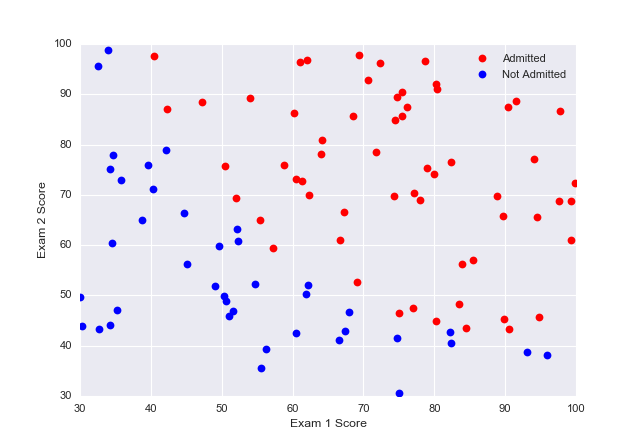

In [5]:
plt.figure()
plotdata(X,y)

plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.legend(['Admitted', 'Not Admitted'])

In [6]:
def sigmoid(z):
    
    # Function used in logistic regression to bind the output of the hypothesis prediction
    # between 0 and 1. Large negatives values approach 0, large positives approach 1.
    
    return 1/(1+np.exp(np.negative(z)))  

In [7]:
def cost_function(theta, X, y):
    
    # Cost function for logistic regression which will penalize a prediction
    # unequal to the true label (this is the function we aim to minimize).
    
    m, n  = np.shape(X)
    hypothesis = sigmoid(X.dot(theta))
    
    cost = (-y.dot(np.log(hypothesis)) - (1-y).dot(np.log(1-hypothesis)))/m
    
    return cost
    
    #return (-y.dot(np.log(sigmoid(X.dot(theta)))) - (1-y).dot(np.log(1-sigmoid(X.dot(theta)))))/m

In [8]:
def gradient(theta, X, y):
    
    # The gradient is the derivative of the cost function evaluated at parameters theta
    # the gradient is used to minimize the cost function.
    
    m, n  = np.shape(X)
    hypothesis = sigmoid(X.dot(theta))
    
    gradient = (hypothesis - y).dot(X)/m
    
    return gradient

In [9]:
def add_x_feature(X):
    
    # Adds a bias feature to the X matrix to account for the intercept.
    
    m,n = np.shape(X)
    X_0 = np.ones(len(X)).reshape(m, 1)
    
    return np.append(X_0, X, 1)

In [10]:
new_X = add_x_feature(X)

In [11]:
m, n = np.shape(new_X)

In [12]:
# Initialize theta as a n * 1 dimensional vector of zeros.

initial_theta = np.zeros(n)

In [13]:
# Run an advanced minimization function to minimize cost.

result = op.minimize(fun=cost_function, 
                     x0=initial_theta, 
                     args=(new_X,y), 
                     method='TNC', 
                     jac=gradient)

optimal_theta = result.x

In [14]:
'Optimal parameter values: {}'.format(optimal_theta[0:])

'Optimal parameter values: [-25.16131855   0.20623159   0.20147149]'

<IPython.core.display.Javascript object>


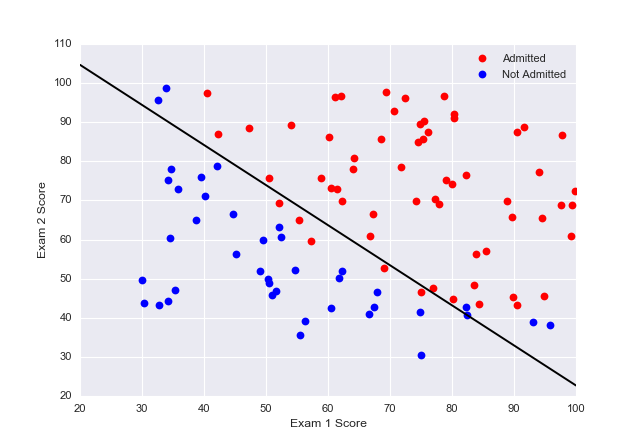

In [15]:
# Plot the data as well as the decision boundary learned from the optimal parameter values.

plt.figure()

plotdata(X,y)

x = np.linspace(20,100)
plt.plot(x, (25.16 - 0.206*x)/0.201, color='black')

plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.legend(['Admitted', 'Not Admitted'])

In [16]:
# Due to the nature of the sigmoid function's range of values (0-1)
# we can interpret the returned value of a prediction as a probability.
# I'll determine this returned value as belonging to the positive class 
# wherever the classifier predicted a "probability" >= .5

pred = (sigmoid(new_X.dot(optimal_theta)) >= .5)

In [17]:
# Convert boolean values to binary

predictions = [int(i) for i in pred]

In [18]:
'Accuracy of non-regularized logistic regression classifier: {}%'.format(sum([int(i) for i in (y == predictions)])/len(y) * 100)

'Accuracy of non-regularized logistic regression classifier: 89.0%'

# Logistic Regression With Regularization

Unlike above, the data set in this example is not linearly separable. However using polynomial transformations of the features we can form a more complex decision boundary. The use of such features may cause the algorithm to learn an overly complex decision boundary that fits the training data well, but does not generalize to new examples. By adding a regularization term to our cost and gradient functions we can ensure that the theta parameters are kept small, and prevent overfitting of the model.

In [19]:
data = np.loadtxt('ex2data2.txt', delimiter=',')

In [20]:
X = data[:,:2]
y = data[:,2]

<IPython.core.display.Javascript object>


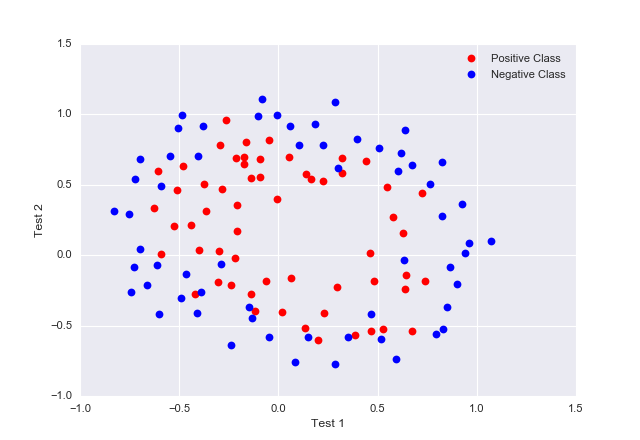

In [21]:
plt.figure()
plotdata(X,y)

plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.legend(['Positive Class', 'Negative Class'])

In [22]:
def cost_function_reg(theta, X, y, lambda_):
    
    # Cost function with regularization term.
    
    m, n  = np.shape(X)
    hypothesis = sigmoid(X.dot(theta))
    
    cost = (-y.dot(np.log(hypothesis)) - 
            (1-y).dot(np.log(1-hypothesis)))/m + lambda_/(2*m) + sum(theta[1:] **2)
    
    return cost

In [23]:
def gradient_reg(theta, X ,y , lambda_):
    
    # Gradient with regularization term.
    
    m, n  = np.shape(X)
    grad = np.zeros(n)
    hypothesis = sigmoid(X.dot(theta))
    
    grad[0] = (hypothesis - y).dot(X[:,0])/m
    grad[1:] = (hypothesis - y).dot(X[:,1:])/m + (lambda_/m) * theta[1:]
    
    return grad

In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [25]:
# Maps the features into all polynomial terms of x1 and x2 up to the sixth power.
# i.e. x1, x2, x1*x2, x1^2, x2^2 ... x1^6 * x2^6

poly = PolynomialFeatures(6)
X_transform = poly.fit_transform(X)

In [26]:
m,n = np.shape(X_transform)

In [27]:
initial_theta = np.zeros(n)

In [28]:
# The regularization parameter lambda controls how much of an effort
# optimization will make to shrink the theta parameters. A larger value of lambda
# will lead to underfitting whereas if lambda = 0 no regularization will take place.

lambda_ = 0.01

In [29]:
result = op.minimize(fun=cost_function_reg, 
                     x0=initial_theta, 
                     args=(X_transform, y, lambda_),
                     method='TNC', 
                     jac=gradient_reg)

optimal_theta = result.x

In [30]:
print('Optimal values of theta: \n\n{}'.format(optimal_theta))

Optimal values of theta: 

[  1.24688137e-02   8.94329667e-03   1.52197668e-02  -2.36510926e-02
  -1.27775322e-02  -1.48507310e-02   4.38113188e-03  -5.25911304e-03
  -5.51248547e-03   3.38034904e-04  -1.59388563e-02  -1.50268855e-03
  -8.19980190e-03  -3.86175048e-03  -1.15914902e-02   6.47602123e-04
  -2.90153069e-03  -1.25258383e-03  -3.68396730e-03  -3.85315987e-03
  -2.03882449e-03  -9.74342050e-03   6.37750326e-05  -4.01903406e-03
  -3.03822924e-04  -4.19952682e-03  -1.68111360e-03  -7.25540273e-03]


In [31]:
# Make predictions on training set.

pred = (sigmoid(X_transform.dot(optimal_theta)) > 0.5) * 1

In [32]:
'Accuracy of regularized logistic regression classifier: {0:.2g}%'.format(sum((pred == y) * 1)/ len(y) * 100)

'Accuracy of regularized logistic regression classifier: 85%'

In [33]:
def plotDecisionBoundary(theta):
    
    # Plots decision boundary for learned parameters theta
    
    X_vals = np.linspace(-1,1.5,50)
    y_vals = np.linspace(-1,1.5,50)
    x1, x2 = np.meshgrid(X_vals, y_vals)
    grid = np.c_[x1.ravel(), x2.ravel()]
    
    z = []
    
    for i in range(len(grid)):
        z.append(poly.fit_transform(grid[i].reshape(1,-1)).dot(theta))
    
    z = np.array(z).reshape(50,50)
    
    plt.figure()
    plt.contour(x1, x2, z,[0], colors = 'black')
    

<IPython.core.display.Javascript object>


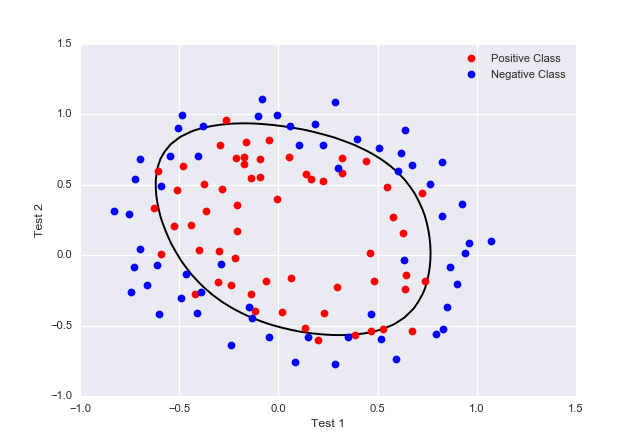

In [34]:
plotDecisionBoundary(optimal_theta)
plotdata(X,y)

plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.legend(['Positive Class', 'Negative Class'])